# Module 3 Text Classification

In [0]:
from fastai.text import *

In [0]:
path = untar_data(URLs.IMDB_SAMPLE)
path.ls()

In [0]:
df = pd.read_csv(path/'texts.csv')
df.head()

In [0]:
# Language model data
data_lm = TextLMDataBunch.from_csv(path, 'texts.csv')

In [0]:
# Classifier model data
data_clas = TextClasDataBunch.from_csv(path, 'texts.csv', vocab=data_lm.train_ds.vocab, bs=32)

## Language model

In [0]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.5)
learn.fit_one_cycle(1, 1e-2)

In [0]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(1, 1e-3)

In [0]:
learn.predict("This is a review about", n_words=10)

In [0]:
learn.save('fine_tuned')

How good is our model? Well let's try to see what it predicts after a few given words.

In [0]:
learn.load('fine_tuned');

In [0]:
TEXT = "I liked this movie because"
N_WORDS = 40
N_SENTENCES = 2

In [0]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

In [0]:
learn.save_encoder('ft_enc')

## Classifier

Now, we'll create a new data object that only grabs the labelled data and keeps those labels. Again, this line takes a bit of time.

In [0]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('ft_enc')

In [0]:
data_clas.show_batch()

In [0]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.733075,0.710040,0.388060,00:22


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


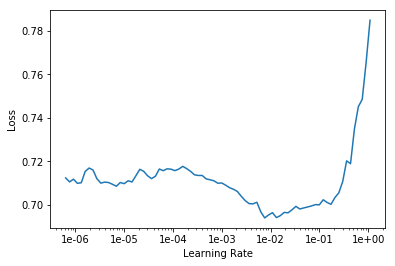

In [0]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(1, slice(2e-3/100, 2e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.694794,0.704034,0.373134,00:45


In [0]:
learn.predict("I really loved that movie, it was awesome!")

(Category positive, tensor(1), tensor([0.4694, 0.5306]))